In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [196]:
data = pd.read_csv("emails.csv", encoding='ISO-8859-1')
data.head()

,text,spam
0,Subject: Weekly Team Sync on Project Alpha,0
1,Subject: Q4 2025 Sales Forecast Review,0
2,Subject: Reminder: Submit Your Expense Report ...,0
3,Subject: Employee Benefits Enrollment Deadline,0
4,Subject: IT Security Training Session Next Week,0


In [197]:
data.shape

(5920, 2)

In [198]:
data['text'][0]

'Subject: Weekly Team Sync on Project Alpha'

In [199]:
data['spam'].value_counts()

spam
0    4447
1    1473
Name: count, dtype: int64

In [200]:
import seaborn as sns

<Axes: ylabel='count'>

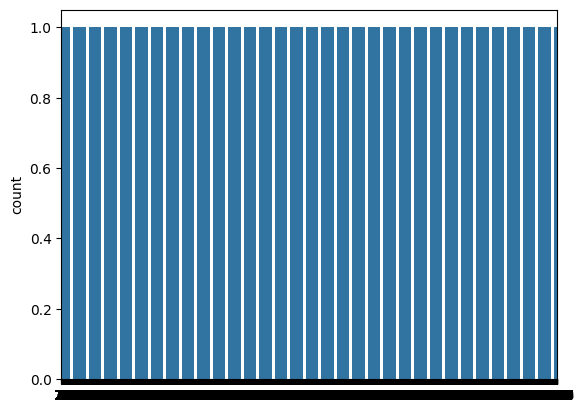

In [201]:
sns.countplot(data['spam'])

In [202]:
data.duplicated().sum()

np.int64(42)

In [203]:
data.drop_duplicates(inplace=True)

In [204]:
data.duplicated().sum()

np.int64(0)

In [205]:
data.isnull().sum()

text    0
spam    0
dtype: int64

In [206]:
data.shape

(5878, 2)

In [207]:
5728 - 33

5695

<Axes: ylabel='count'>

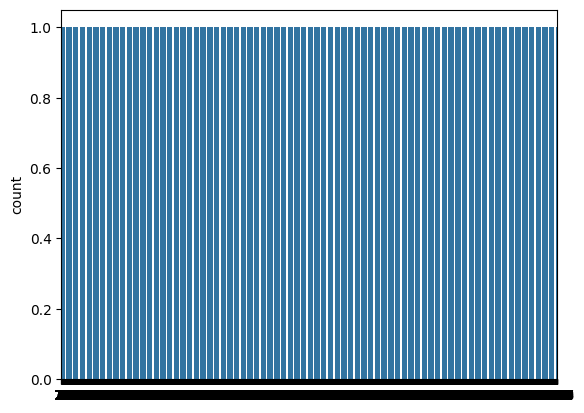

In [208]:
sns.countplot(data['spam'])

In [209]:
data['spam'].value_counts()

spam
0    4407
1    1471
Name: count, dtype: int64

# Separate in X and Y

In [210]:
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Keep only letters
    text = text.lower()  # Lowercase
    return text
X = data['text'].apply(clean_text)
y = data['spam'].values

In [211]:
y

array([0, 0, 0, ..., 0, 0, 0], shape=(5878,))

# Train - Test split

In [212]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 , random_state= 0)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=0
)

In [213]:
X_train.shape

(4702,)

In [214]:
X_test.shape

(1176,)

In [215]:
y_train.shape

(4702,)

In [216]:
y_test.shape

(1176,)

# Preprocessing 

In [217]:
from sklearn.feature_extraction.text import CountVectorizer

In [218]:
cv = CountVectorizer(
    stop_words='english',  # Remove common words
    ngram_range=(1, 2),    # Include bigrams
    max_features=5000       # Limit vocabulary size
)


# Training by ML Algorithm

In [219]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
nb = MultinomialNB()

In [220]:
pipe = make_pipeline(cv, nb)

In [221]:
from sklearn.model_selection import GridSearchCV
params = {
    'multinomialnb__alpha': [0.1, 0.5, 1.0],
    'countvectorizer__ngram_range': [(1,1), (1,2)]
}
grid = GridSearchCV(pipe, params, cv=5)


In [222]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('countvectorizer',
                                        CountVectorizer(max_features=5000,
                                                        ngram_range=(1, 2),
                                                        stop_words='english')),
                                       ('multinomialnb', MultinomialNB())]),
             param_grid={'countvectorizer__ngram_range': [(1, 1), (1, 2)],
                         'multinomialnb__alpha': [0.1, 0.5, 1.0]})

In [223]:
# y_pred = pipe.predict(X_test)
y_pred = grid.best_estimator_.predict(X_test)

In [224]:
from sklearn.metrics import classification_report, accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9736394557823129
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       882
           1       0.94      0.96      0.95       294

    accuracy                           0.97      1176
   macro avg       0.96      0.97      0.97      1176
weighted avg       0.97      0.97      0.97      1176



In [225]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       882
           1       0.94      0.96      0.95       294

    accuracy                           0.97      1176
   macro avg       0.96      0.97      0.97      1176
weighted avg       0.97      0.97      0.97      1176



In [227]:
# Test prediction with example email
email = ['Hey i am Elon Musk. Get a brand new car from Tesla']
prediction = grid.best_estimator_.predict(email)
probabilities = grid.best_estimator_.predict_proba(email)

print(f"Prediction: {'Spam' if prediction[0] == 1 else 'Not Spam'}")
print(f"Confidence: Spam: {probabilities[0][1]:.2%}, Not Spam: {probabilities[0][0]:.2%}")

Prediction: Spam
Confidence: Spam: 95.25%, Not Spam: 4.75%


In [228]:
import pickle
# pickle.dump(pipe, open("Naive_model.pkl",'wb'))
pickle.dump(grid.best_estimator_, open("Naive_model.pkl", 'wb'))